In [2]:
import pandas as pd
from xgboost import XGBClassifier
from skopt import BayesSearchCV
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import RobustScaler
from skopt.space import Real, Integer

In [36]:
from sklearn.model_selection import RandomizedSearchCV

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [5]:
from sklearn.metrics import classification_report, accuracy_score

In [6]:
data = pd.read_csv('C:\\Users\\Predator\\Downloads\\nasa.csv')

In [7]:
df = data.copy()

In [8]:
df.shape

(4687, 40)

In [9]:
pd.options.display.max_columns = 40

In [10]:
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbiting Body,Orbit ID,Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-01,788947200000,6.115834,22017.003799,13680.509944,0.419483,163.178711,62753692.0,38993336.0,Earth,17,2017-04-06 08:36:37,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,1995-01-01,788947200000,18.113985,65210.346095,40519.173105,0.383014,148.992630,57298148.0,35603420.0,Earth,21,2017-04-06 08:32:49,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,1995-01-08,789552000000,7.590711,27326.560182,16979.661798,0.050956,19.821890,7622911.5,4736657.5,Earth,22,2017-04-06 09:20:19,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,1995-01-15,790156800000,11.173874,40225.948191,24994.839864,0.285322,110.990387,42683616.0,26522368.0,Earth,7,2017-04-06 09:15:49,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-15,790156800000,9.840831,35426.991794,22012.954985,0.407832,158.646713,61010824.0,37910368.0,Earth,25,2017-04-06 08:57:58,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [11]:
df['Equinox'].nunique()

1

In [12]:
df['Epoch Osculation'].nunique()

429

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [14]:
df.drop(['Neo Reference ID', 'Name', 'Close Approach Date','Orbit ID','Orbiting Body','Equinox','Orbit Determination Date'], inplace = True, axis = 1)

In [15]:
df.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,788947200000,6.115834,22017.003799,13680.509944,0.419483,163.178711,62753692.0,38993336.0,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,True
1,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,788947200000,18.113985,65210.346095,40519.173105,0.383014,148.992630,57298148.0,35603420.0,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,False
2,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,789552000000,7.590711,27326.560182,16979.661798,0.050956,19.821890,7622911.5,4736657.5,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,True
3,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,790156800000,11.173874,40225.948191,24994.839864,0.285322,110.990387,42683616.0,26522368.0,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,False
4,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,790156800000,9.840831,35426.991794,22012.954985,0.407832,158.646713,61010824.0,37910368.0,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,True


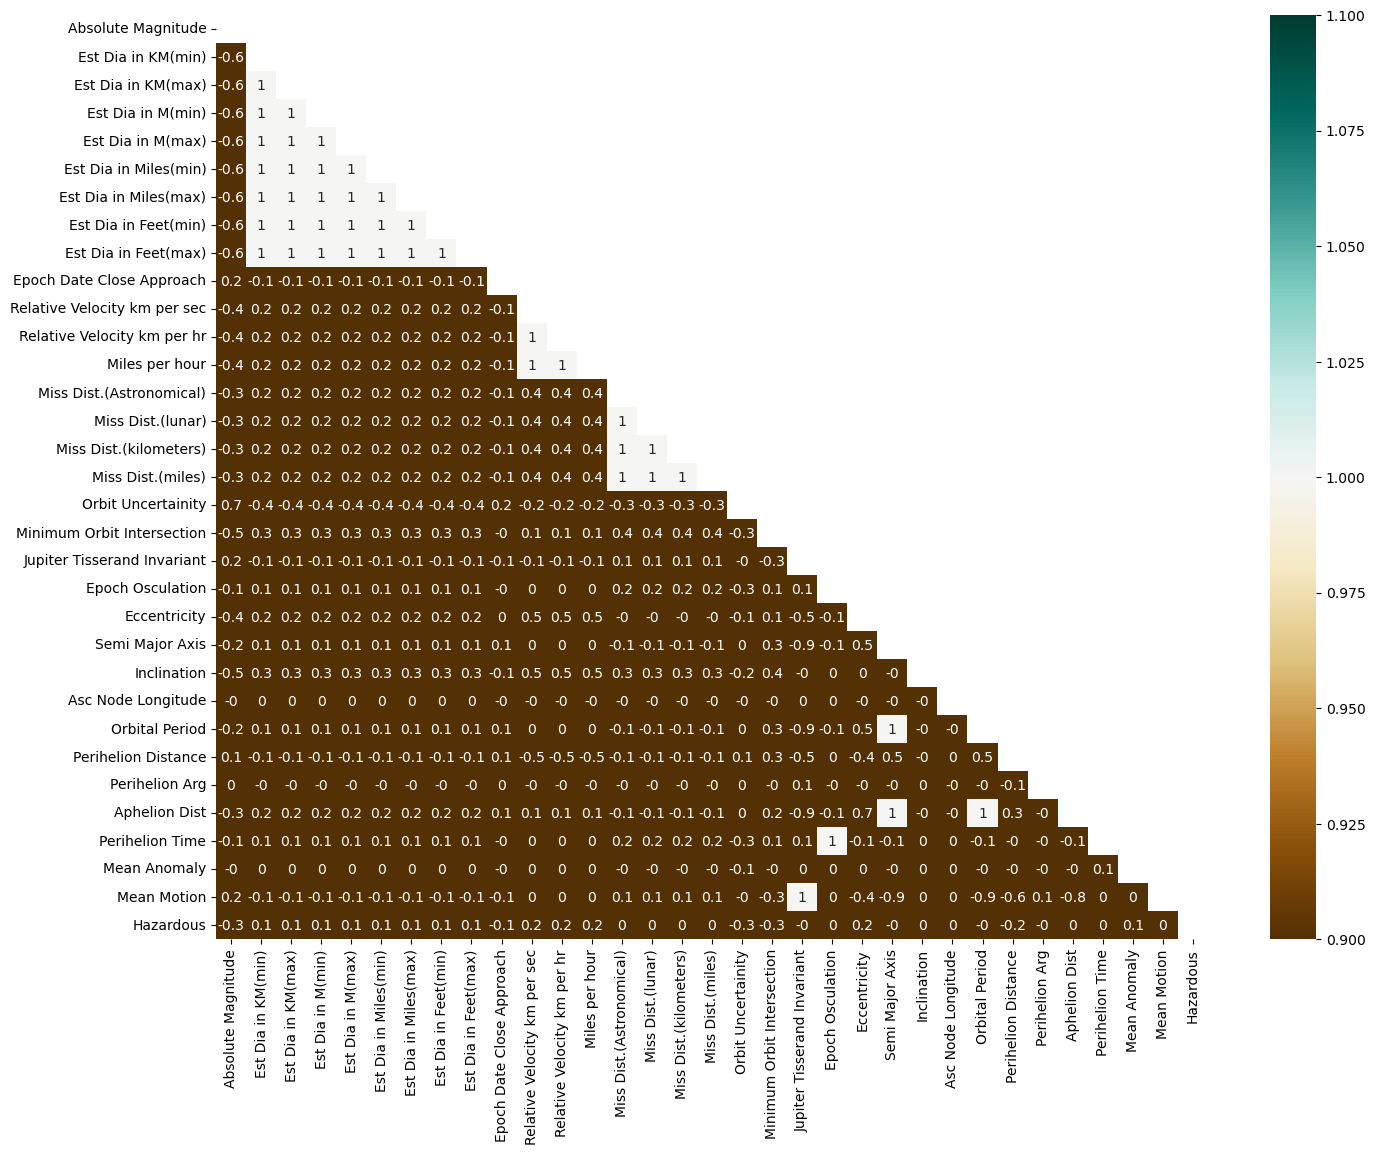

In [27]:
plt.figure(figsize = (16,12))
mask = np.triu(np.ones_like(df.corr()))
heatmap = sns.heatmap(round(df.corr(),1), mask = mask, vmin = 1, vmax = 1, annot = True, cmap = 'BrBG')

In [16]:
df.drop(['Est Dia in M(min)','Est Dia in M(max)','Est Dia in Miles(min)','Est Dia in Miles(max)','Est Dia in Feet(min)',
        'Est Dia in Feet(max)','Miles per hour','Miss Dist.(lunar)','Miss Dist.(miles)','Orbital Period','Aphelion Dist','Epoch Osculation',
        'Jupiter Tisserand Invariant'], axis = 1, inplace = True)

In [17]:
df.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miss Dist.(Astronomical),Miss Dist.(kilometers),Orbit Uncertainity,Minimum Orbit Intersection,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Perihelion Distance,Perihelion Arg,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,21.6,0.127220,0.284472,788947200000,6.115834,22017.003799,0.419483,62753692.0,5,0.025282,0.425549,1.407011,6.025981,314.373913,0.808259,57.257470,2.458162e+06,264.837533,0.590551,True
1,21.3,0.146068,0.326618,788947200000,18.113985,65210.346095,0.383014,57298148.0,3,0.186935,0.351674,1.107776,28.412996,136.717242,0.718200,313.091975,2.457795e+06,173.741112,0.845330,False
2,20.3,0.231502,0.517654,789552000000,7.590711,27326.560182,0.050956,7622911.5,0,0.043058,0.348248,1.458824,4.237961,259.475979,0.950791,248.415038,2.458120e+06,292.893654,0.559371,True
3,27.4,0.008801,0.019681,790156800000,11.173874,40225.948191,0.285322,42683616.0,6,0.005512,0.216578,1.255903,7.905894,57.173266,0.983902,18.707701,2.457902e+06,68.741007,0.700277,False
4,21.6,0.127220,0.284472,790156800000,9.840831,35426.991794,0.407832,61010824.0,1,0.034798,0.210448,1.225615,16.793382,84.629307,0.967687,158.263596,2.457814e+06,135.142133,0.726395,True


In [18]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [19]:
y.value_counts()

Hazardous
False    3932
True      755
Name: count, dtype: int64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, stratify = y)

In [21]:
scaler = RobustScaler().fit(X_train)

In [22]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
xgb = XGBClassifier(n_estimators = 10, learning_rate = 0.2).fit(X_train, y_train)

In [24]:
xgb1 = XGBClassifier(n_jobs = -1)

In [25]:
xgb_pred = xgb.predict(X_test)

In [26]:
accuracy_score(y_test, xgb_pred)

0.9957356076759062

In [27]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       787
        True       0.99      0.99      0.99       151

    accuracy                           1.00       938
   macro avg       0.99      0.99      0.99       938
weighted avg       1.00      1.00      1.00       938



In [37]:
xgb1_params = {
    'n_estimators':[5,10,15,20,25],
    'learning_rate':[0.001, 0.01, 0.1, 0.2, 0.5],
    'max_depth': [1,2,4,8,10],
    'gamma': [0,1,2,5,10]
}

In [29]:
bayopt = BayesSearchCV(xgb1,
                      {'n_estimators':Integer(1,10,prior = 'uniform'),
                       'learning_rate':Real(0.01,1,prior='uniform'),
                       'max_depth': Integer(1,10,'uniform')}
                      )

In [30]:
bayopt.fit(X_train, y_train)

BayesSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None, device=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric=None, feature_types=None,
                                      gamma=None, grow_policy=None,
                                      importance_type=None,
                                      interaction_constraints=None,
                                      learning_rate=None, max_...
                                      missing=nan, monotone_constraints=None,
                                      multi_strategy=None, n_estimators=None,
                                      n_jobs=-1, num_parallel_tree=None,
                                      random_state=None, ...),
              search_spaces={'learning_rate': Real(low=0.01, high=1, prior='uniform', transform='normalize'),
                             'max_depth': Integer(low=1, high=10, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=1, high=10, prior='uniform', transform='normalize')})

In [31]:
bayopt_pred = bayopt.predict(X_test)

In [35]:
accuracy_score(y_test, bayopt_pred)

0.9968017057569296

In [32]:
print(classification_report(y_test, bayopt_pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       787
        True       0.99      0.99      0.99       151

    accuracy                           1.00       938
   macro avg       1.00      0.99      0.99       938
weighted avg       1.00      1.00      1.00       938



In [34]:
print(bayopt.best_params_)

OrderedDict([('learning_rate', 0.9292589925013155), ('max_depth', 4), ('n_estimators', 9)])


In [39]:
rs = RandomizedSearchCV(estimator = xgb1, param_distributions = xgb1_params, n_jobs = -1, cv = 5)

In [46]:
rs.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=-1,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'gamma': [0, 1, 2, 5, 10],
                                        'learning_rate': [0.001, 0.01, 0.1, 0.2,
                                                          0.5],
                                        'max_depth': [1, 2, 4, 8, 10],
                                        'n_estimators': [5, 10, 15, 20, 25]})

In [47]:
rs_pred = rs.predict(X_test)

In [48]:
print(classification_report(y_test, rs_pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       787
        True       0.99      0.99      0.99       151

    accuracy                           1.00       938
   macro avg       0.99      0.99      0.99       938
weighted avg       1.00      1.00      1.00       938



In [49]:
accuracy_score(y_test, rs_pred)

0.9957356076759062

In [50]:
print(rs.best_params_)

{'n_estimators': 15, 'max_depth': 10, 'learning_rate': 0.2, 'gamma': 1}
